# Heavy Traffic Indicators on I-94 

We are going to analyse a dataset on westbound traffic on I-94 interstate highway. 

The goal of this analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that traffic is heavier during the rush hours or during the winter when it snows. 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

i94 = pd.read_csv('Downloads/Datasets/Metro_Interstate_Traffic_Volume.csv.gz') #importing the dataset

In [8]:
print(i94.head(5)) 
print(i94.tail(5))
i94.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199     NaN  283.45      0.0      0.0          75        Clouds   
48200     NaN  282.76      0.0      0.0          90        Clouds   
48201     NaN  282.73      0.0      0.0   

<Axes: ylabel='Frequency'>

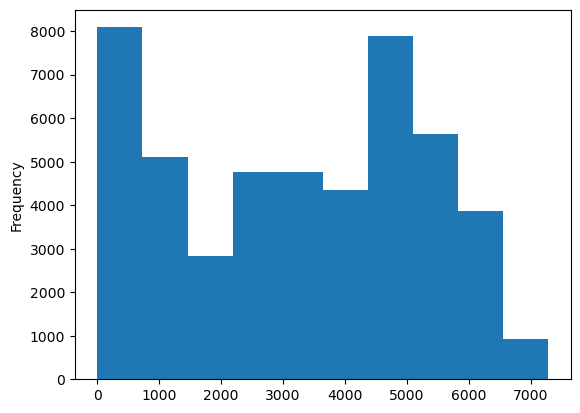

In [9]:
i94['traffic_volume'].plot.hist()

In [10]:
i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic varied from 0 vehicles to 7280 vehicles passing in an hour with an average of 3260 vehicles. 

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

## Traffic volume : Day vs Night 

In [50]:
i94['date_time'] = pd.to_datetime(i94['date_time'])
i94['date_time'].dt.hour

day = i94.copy()[(i94['date_time'].dt.hour >= 7) & (i94['date_time'].dt.hour< 19)]
print(day.shape)

night = i94.copy()[(i94['date_time'].dt.hour>= 19) | (i94['date_time'].dt.hour < 7)]
print(night.shape)



(23877, 9)
(24327, 9)


This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 (i_94.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).

Now that we've isolated day and night, we're going to look at the histograms of traffic volume side-by-side by using a grid chart.

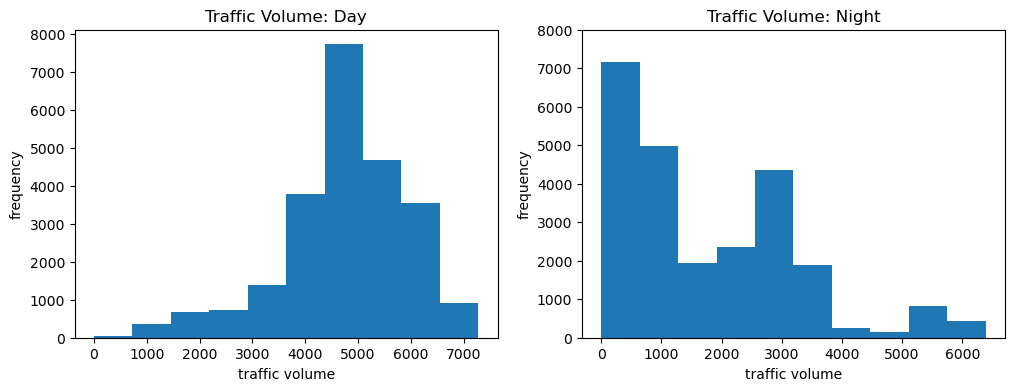

In [34]:
plt.figure(figsize =(12,4))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume: Day')
plt.xlabel('traffic volume')
plt.ylabel('frequency')

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.xlabel('traffic volume')
plt.ylabel('frequency')

plt.show()

In [21]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [22]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The graphs clearly show us that the daytime traffic volume which is left skewed, is significantly higher than the nighttime traffic volume which is right skewed. 

Although there are times during the night when the traffic volume is higher 5000, this is minimal compared the traffic volume during the day. Since the goal of our project is to find heavy indicators of traffic, we will ignore the nighttime traffic data and consider only daytime data for further analysis. 

## Time indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

In [56]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   holiday         0 non-null      object        
 1   temp            23877 non-null  float64       
 2   rain_1h         23877 non-null  float64       
 3   snow_1h         23877 non-null  float64       
 4   clouds_all      23877 non-null  int64         
 5   date_time       23877 non-null  datetime64[ns]
 6   traffic_volume  23877 non-null  int64         
 7   month           23877 non-null  int32         
 8   year            23877 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(1)
memory usage: 1.6+ MB


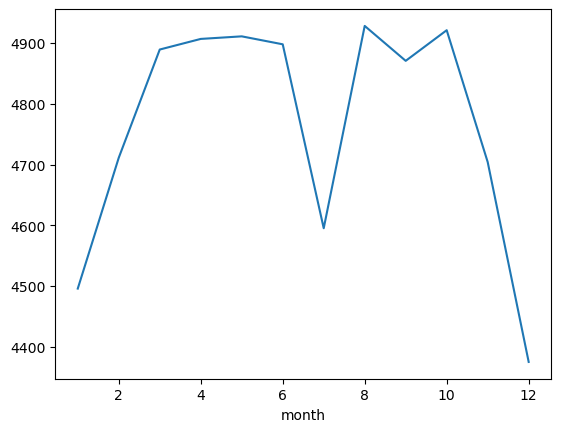

In [57]:
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

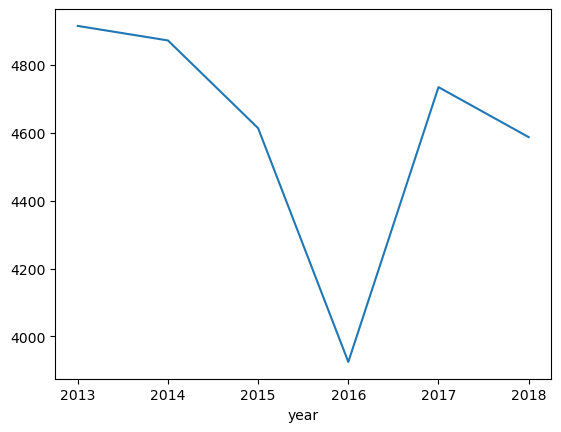

In [59]:
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) from 2016 supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

#### Day of week :

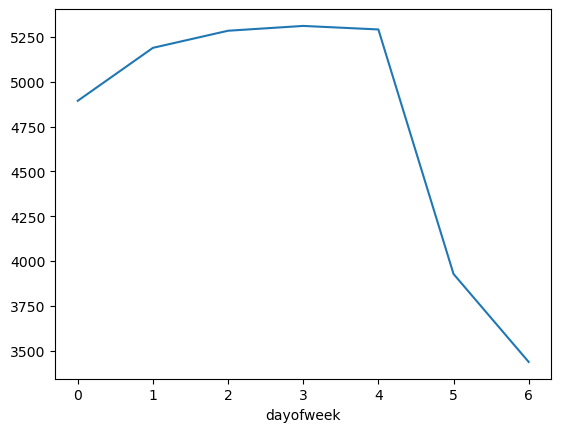

In [60]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

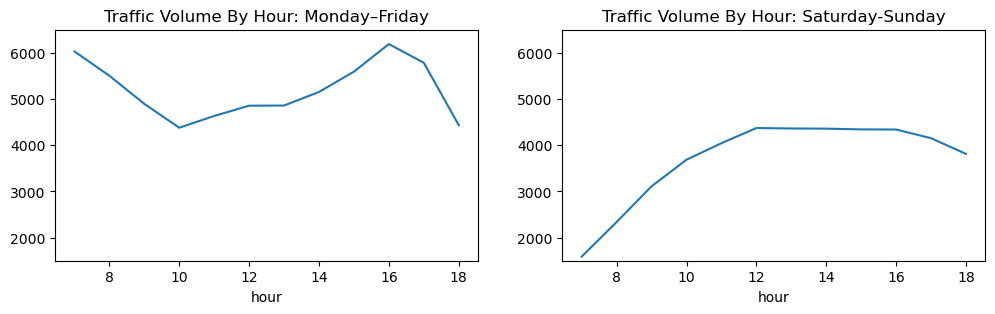

In [63]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4]
weekend = day.copy()[day['dayofweek'] >= 5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
plt.ylim(1500,6500)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.ylim(1500, 6500)
plt.title('Traffic Volume By Hour: Saturday-Sunday')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators 

In [65]:
day_weather = i94.copy()[(i94['date_time'].dt.hour >= 7) & (i94['date_time'].dt.hour< 19)]
print(day_weather.shape)


(23877, 9)


In [67]:
day_weather.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,NaN,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,NaN,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584
7,NaN,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015
8,NaN,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791
9,NaN,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770


In [68]:
day_weather1 = day_weather.drop(columns = ['weather_description'])
day_weather1.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,2012-10-02 13:00:00,4918
5,NaN,291.72,0.0,0.0,1,Clear,2012-10-02 14:00:00,5181
6,NaN,293.17,0.0,0.0,1,Clear,2012-10-02 15:00:00,5584
7,NaN,293.86,0.0,0.0,1,Clear,2012-10-02 16:00:00,6015
8,NaN,294.14,0.0,0.0,20,Clouds,2012-10-02 17:00:00,5791
9,NaN,293.10,0.0,0.0,20,Clouds,2012-10-02 18:00:00,4770


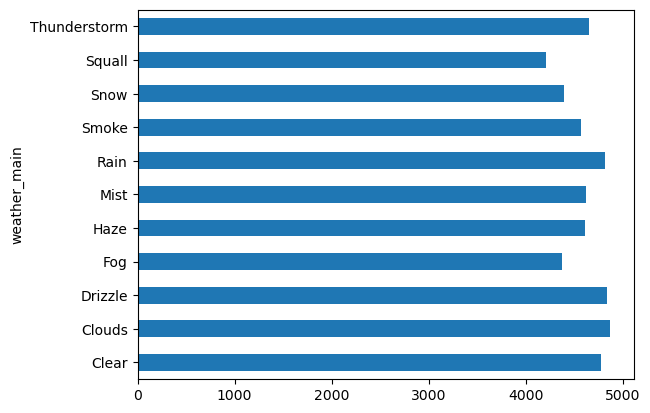

In [69]:
by_weather_main = day_weather1.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

In [71]:
day_weather2 = day_weather.drop(columns = ['weather_main'])
day_weather2.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,broken clouds,2012-10-02 13:00:00,4918
5,NaN,291.72,0.0,0.0,1,sky is clear,2012-10-02 14:00:00,5181
6,NaN,293.17,0.0,0.0,1,sky is clear,2012-10-02 15:00:00,5584
7,NaN,293.86,0.0,0.0,1,sky is clear,2012-10-02 16:00:00,6015
8,NaN,294.14,0.0,0.0,20,few clouds,2012-10-02 17:00:00,5791
9,NaN,293.10,0.0,0.0,20,few clouds,2012-10-02 18:00:00,4770


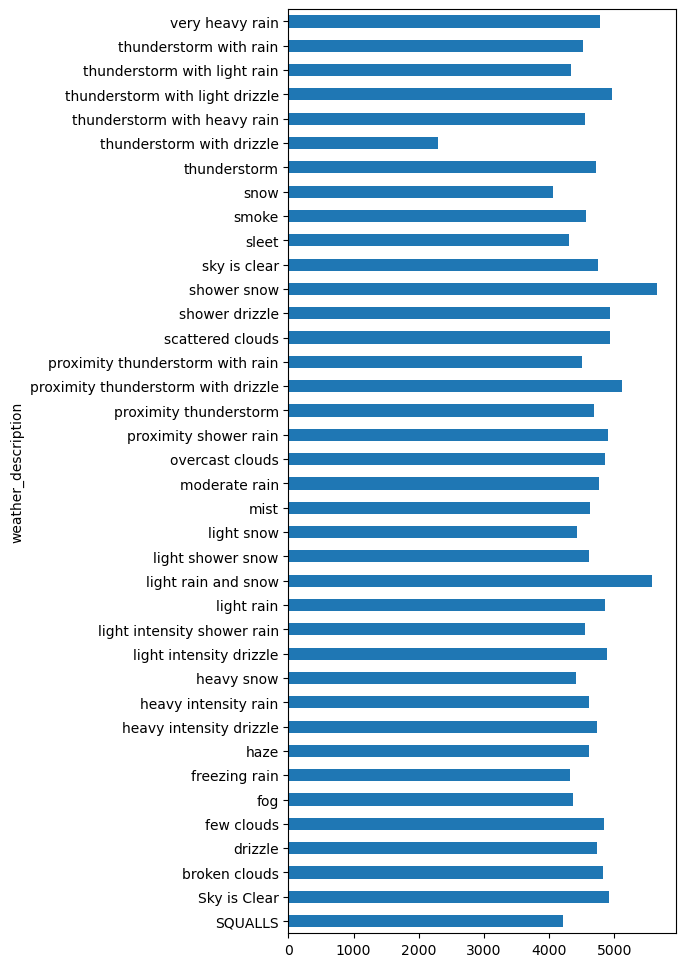

In [74]:
by_weather_description = day_weather2.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,12))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is slightly bad instead of riding a bike or walking.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

1. Time indicators:
-  The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
-  The traffic is usually heavier on business days compared to the weekends.
-  On business days, the rush hours are around 7 and 16.
2. Weather indicators:
-  Shower snow
-  Light rain and snow
-  Proximity thunderstorm with drizzle